In [1]:
# Tests using Quantum Artificial Neural models implementation on quantum_neural_models.ipynb
# Author: Eduardo Barreto Brito/CIn UFPE

In [2]:
%run quantum_neural_models.ipynb

In [3]:
from qiskit.tools.visualization import plot_histogram

def run_circuit_and_plot_histogram(circuit):
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend = simulator, shots=num_of_simulations).result()
    plot_histogram(result.get_counts(circuit))    

In [4]:
def run_circuit_and_get_amplitude(circuit):
    circuit = circuit.reverse_bits()
    backend = Aer.get_backend('statevector_simulator')
    result = execute(circuit, backend, shots=1000).result()
    statevector = result.get_statevector(circuit)
    return statevector.round(5)

  q0    q1    ampl
----  ----  ------
   0     0       1
   0     1      -1
   1     0      -1
   1     1      -1


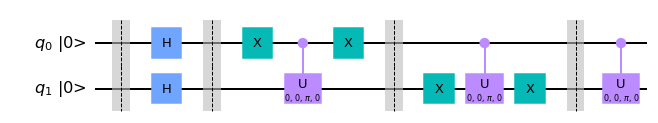

In [5]:
input = [1, -1, -1, -1]

an = BruteForceQan(2, add_ancilla = False)
an.show_qubits_to_input_amplitudes_table(input)

an.append_hadamard_gates()
an.append_circuit(input)

an._circuit.draw(output='mpl', initial_state=True)

In [6]:
print("Circuit unitary:\n", run_circuit_and_get_amplitude(an._circuit))

Circuit unitary:
 [ 0.5+0.j -0.5+0.j -0.5-0.j -0.5+0.j]


  q0    q1    ampl
----  ----  ------
   0     0     0.3
   0     1    -0.2
   1     0     0.6
   1     1    -0.9


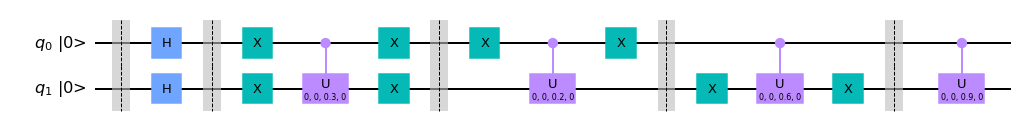

In [7]:
input = [0.3, -0.2, 0.6, -0.9]
an = PhaseEncodingBruteForceQan(2, add_ancilla = False)

an.show_qubits_to_input_amplitudes_table(input)

an.append_hadamard_gates()
an.append_circuit(input)

an._circuit.draw(output='mpl', initial_state=True)

In [8]:
print("Circuit unitary:\n", run_circuit_and_get_amplitude(an._circuit))

Circuit unitary:
 [0.47767+0.14776j 0.49003+0.09933j 0.41267+0.28232j 0.3108 +0.39166j]


  q0    q1    ampl
----  ----  ------
   0     0       1
   0     1      -1
   1     0      -1
   1     1      -1


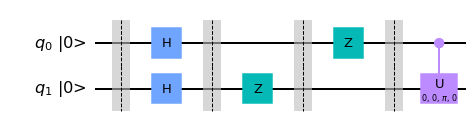

In [9]:
input = [1, -1, -1, -1]
an = HSGSQan(2, add_ancilla = False)

an.show_qubits_to_input_amplitudes_table(input)

an.append_hadamard_gates()
an.append_circuit(input)

an._circuit.draw(output='mpl', initial_state=True)

In [10]:
print("Circuit unitary:\n", run_circuit_and_get_amplitude(an._circuit))

Circuit unitary:
 [ 0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]


In [11]:
input = [1, -1, -1, -1]
weight = [1, -1, 1, -1]

an = BruteForceQan(2)
an.build_circuit(input, weight)
print(an.get_neuron_activation_probability())

0.2490234375


In [12]:
input = [1, -1, -1, -1]
weight = [1, -1, 1, -1]

an = HSGSQan(2)
an.build_circuit(input, weight)
print(an.get_neuron_activation_probability())

0.24853515625


In [13]:
input = [0.3, 0.2, 0.6, 0.9]
weight = [0.3, -0.2, 0.6, -0.9]

an = PhaseEncodingBruteForceQan(2)
an.build_circuit(input, weight)
print(an.get_neuron_activation_probability())

0.7236328125
